In [113]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [9]:
all_seasons_home_stats_df = pd.read_csv('all_season_home.csv')
all_seasons_away_stats_df = pd.read_csv('all_season_away.csv')

In [96]:
home_goals = all_seasons_home_stats_df['home_team_goal_count']
away_goals = all_seasons_away_stats_df['away_team_goal_count']

columns_to_drop_home = ['date_GMT','timestamp','home_team_goal_count','total_goal_count','total_goals_at_half_time','home_team_goal_count_half_time','away_team_goal_count_half_time','home_team_goal_timings'
                   ,'away_team_goal_timings','home_team_corner_count','away_team_corner_count','home_team_yellow_cards','home_team_red_cards','away_team_yellow_cards','away_team_red_cards',
                   'home_team_first_half_cards','home_team_second_half_cards','away_team_first_half_cards','away_team_second_half_cards','home_team_shots','away_team_shots','home_team_shots_on_target',
                   'away_team_shots_on_target','home_team_shots_off_target','away_team_shots_off_target','home_team_fouls','away_team_fouls','home_team_possession','away_team_possession',
                   'status','attendance']

columns_to_drop_away = ['date_GMT','timestamp','away_team_goal_count','total_goal_count','total_goals_at_half_time','home_team_goal_count_half_time','away_team_goal_count_half_time','home_team_goal_timings'
                   ,'away_team_goal_timings','home_team_corner_count','away_team_corner_count','home_team_yellow_cards','home_team_red_cards','away_team_yellow_cards','away_team_red_cards',
                   'home_team_first_half_cards','home_team_second_half_cards','away_team_first_half_cards','away_team_second_half_cards','home_team_shots','away_team_shots','home_team_shots_on_target',
                   'away_team_shots_on_target','home_team_shots_off_target','away_team_shots_off_target','home_team_fouls','away_team_fouls','home_team_possession','away_team_possession',
                   'status','attendance']

# Drop these columns from the predictor variables DataFrame
y_home = all_seasons_home_stats_df['home_team_goal_count']
y_away = all_seasons_away_stats_df['away_team_goal_count']
X_home = all_seasons_home_stats_df.drop(columns_to_drop_home, axis=1)
X_away = all_seasons_away_stats_df.drop(columns_to_drop_away, axis=1)

In [98]:
print(X_home.shape)
print(y_home.shape)

(8048, 678)
(8048,)


In [135]:
class SoccerNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SoccerNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)  

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [128]:
scaler = StandardScaler()
X_home_np = X_home.values
y_home_np = y_home.values
scaler.fit(X_home_np)
inputs = torch.tensor(X_home_np, dtype=torch.float)
labels = torch.tensor(y_home_np, dtype=torch.float)
labels = torch.tensor(y_home_np, dtype=torch.float).unsqueeze(1)

In [97]:
X_home

,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,away_team_goal_count,Home Team Pre-Match xG,...,rolling_avg_goals_conceded_min_61_to_70,rolling_avg_goals_conceded_min_71_to_80,rolling_avg_goals_conceded_min_81_to_90,rolling_avg_draw_percentage_overall,rolling_avg_draw_percentage_home,rolling_avg_draw_percentage_away,rolling_avg_loss_percentage_ovearll,rolling_avg_loss_percentage_home,rolling_avg_loss_percentage_away,rolling_avg_over145_corners_percentage
0,1.0,7.0,96.0,4.0,3.00,3.00,1.95,0.58,1.0,0.00,...,2.0,7.0,8.0,16.0,11.0,21.0,24.0,11.0,37.0,0.0
1,1.0,52.0,69.0,6.0,3.00,0.00,1.95,0.89,3.0,0.00,...,2.0,7.0,8.0,16.0,11.0,21.0,24.0,11.0,37.0,0.0
2,1.0,4.0,65.0,8.0,2.00,0.67,1.95,0.68,1.0,0.00,...,2.0,7.0,8.0,16.0,11.0,21.0,24.0,11.0,37.0,0.0
3,1.0,53.0,73.0,10.0,2.25,0.50,1.95,0.68,0.0,0.00,...,2.0,7.0,8.0,16.0,11.0,21.0,24.0,11.0,37.0,0.0
4,1.0,34.0,72.0,11.0,2.40,1.40,1.95,1.05,1.0,0.00,...,2.0,7.0,8.0,16.0,11.0,21.0,24.0,11.0,37.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8043,55.0,17.0,5.0,28.0,1.42,0.92,1.26,1.00,2.0,1.46,...,5.0,3.0,8.0,24.0,21.0,26.0,45.0,42.0,47.0,13.0
8044,55.0,25.0,51.0,30.0,1.43,0.71,1.26,1.05,3.0,1.51,...,5.0,3.0,8.0,24.0,21.0,26.0,45.0,42.0,47.0,13.0
8045,55.0,2.0,23.0,31.0,1.33,1.20,1.26,1.16,1.0,1.54,...,5.0,3.0,8.0,24.0,21.0,26.0,45.0,42.0,47.0,13.0
8046,55.0,29.0,65.0,33.0,1.35,2.47,1.26,2.42,5.0,1.51,...,5.0,3.0,8.0,24.0,21.0,26.0,45.0,42.0,47.0,13.0


In [129]:
print(inputs.shape)
print(labels.shape)

torch.Size([8048, 678])
torch.Size([8048, 1])


In [140]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
home_net = SoccerNet(inputs.shape[1],50,1)
home_net.to(device)
criterion = nn.MSELoss() 
optimizer = optim.SGD(home_net.parameters(), lr=0.0001)

# Move the input and label tensors to the GPU
inputs = inputs.to(device)
labels = labels.to(device)

Epoch 100, Loss: 3064753664.0
Epoch 200, Loss: 2944571648.0
Epoch 300, Loss: 2829102592.0
Epoch 400, Loss: 2718160640.0
Epoch 500, Loss: 2611569152.0
Epoch 600, Loss: 2509158912.0
Epoch 700, Loss: 2410764032.0
Epoch 800, Loss: 2316230400.0
Epoch 900, Loss: 2225400576.0
Epoch 1000, Loss: 2138132992.0
Epoch 1100, Loss: 2054286976.0
Epoch 1200, Loss: 1973729280.0
Epoch 1300, Loss: 1896330880.0
Epoch 1400, Loss: 1821967104.0
Epoch 1500, Loss: 1750519936.0
Epoch 1600, Loss: 1681874688.0
Epoch 1700, Loss: 1615920640.0
Epoch 1800, Loss: 1552553600.0
Epoch 1900, Loss: 1491670144.0
Epoch 2000, Loss: 1433175040.0
Epoch 2100, Loss: 1376974080.0
Epoch 2200, Loss: 1322977152.0
Epoch 2300, Loss: 1271097088.0
Epoch 2400, Loss: 1221252224.0
Epoch 2500, Loss: 1173361408.0
Epoch 2600, Loss: 1127348864.0
Epoch 2700, Loss: 1083140864.0
Epoch 2800, Loss: 1040665600.0
Epoch 2900, Loss: 999856512.0
Epoch 3000, Loss: 960647872.0
Epoch 3100, Loss: 922976576.0
Epoch 3200, Loss: 886782784.0
Epoch 3300, Loss: 852

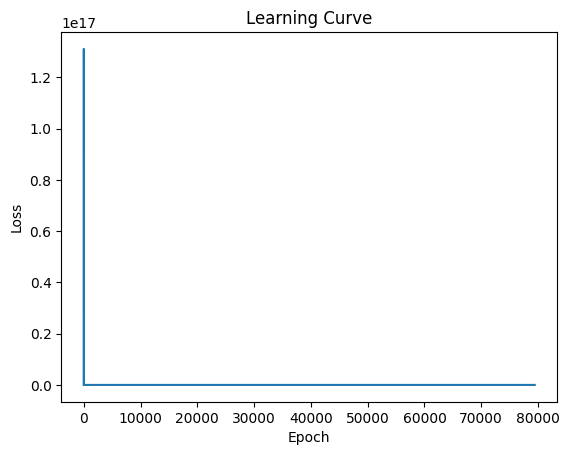

In [141]:
# Lists to store the loss values and epochs
loss_values = []
epochs = []

prev_loss = None
unchanged_count = 0

for epoch in range(1000000):
    # Forward pass
    outputs = home_net(inputs)
    loss = criterion(outputs, labels)
    
    # Check if loss remains the same
    if prev_loss is not None and loss.item() == prev_loss:
        unchanged_count += 1
    else:
        unchanged_count = 0
    
    # Break the loop if loss remained unchanged for 10 epochs
    if unchanged_count == 100:
        print(f'Loss remained unchanged for 10 epochs. Stopping training.')
        break
    
    # Update previous loss
    prev_loss = loss.item()
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')

    loss_values.append(loss.item())
    epochs.append(epoch + 1)

# Plot the learning curve
plt.plot(epochs, loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.show()

# Save the model if needed
torch.save(home_net.state_dict(), 'soccer_net.ckpt')